In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [13]:
ex = pd.read_json("../results/pairwise_agreement_explain/rankings.jsonl", lines=True)
exs = pd.read_json("../results/pairwise_agreement_explain_shuffle/rankings.jsonl", lines=True)
nex = pd.read_json("../results/pairwise_agreement_no_explain/rankings.jsonl", lines=True)
nexs = pd.read_json("../results/pairwise_agreement_no_explain_shuffle/rankings.jsonl", lines=True)

ex['Explain'] = ['True']*len(ex)
ex['Shuffle'] = ['False']*len(ex)

exs['Explain'] = ['True']*len(exs)
exs['Shuffle'] = ['True']*len(exs)

nex['Explain'] = ['False']*len(nex)
nex['Shuffle'] = ['False']*len(nex)

nexs['Explain'] = ['False']*len(nexs)
nexs['Shuffle'] = ['True']*len(nexs)

data = pd.concat([ex, exs, nex, nexs])

In [14]:
data

,prompt,answers,rating_text,ranking_order,model_ranking,k,pairwise,Explain,Shuffle
0,\n\nHuman: You will be given a definition of a...,"[{'answer': 'The topic of the question is ""The...",This is a good natured conversation.\n\nPairwi...,"[1, 0, 5, 6, 3, 2, 4]","[gpt-3.5-turbo, gpt-4-0613, mistral-7b-instruc...",7,"[1, 5, 5, 3, 2, 2]",True,False
1,\n\nHuman: You will be given a definition of a...,[{'answer': 'Topic: Stephen King Confidence: 9...,This is a good natured conversation.\n\nPairwi...,"[0, 1, 4, 5, 3, 2]","[llama-2-70b-chat, gpt-3.5-turbo-instruct, gpt...",6,"[0, 1, 5, 5, 3]",True,False
2,\n\nHuman: You will be given a definition of a...,"[{'answer': 'The topic of the question is ""The...","This is a good natured conversation.\n\n('A', ...","[0, 2, 1, 4, 3]","[gpt-3.5-turbo, gpt-4-0613, gpt-4, mistral-7b-...",5,"[0, 2, 4, 4]",True,False
3,\n\nHuman: You will be given a definition of a...,"[{'answer': 'The topic of the question is ""Ste...","This is a good natured conversation.\n\n('A', ...","[0, 3, 2, 1]","[mistral-7b-instruct-v0.1, gpt-4, gpt-3.5-turb...",4,"[0, 3, 2]",True,False
4,\n\nHuman: You will be given a definition of a...,"[{'answer': 'The topic of the question is ""The...",This is a good natured conversation.\n\nPairwi...,"[0, 2, 1]","[gpt-3.5-turbo, gpt-4-0613, gpt-4]",3,"[0, 1]",True,False
...,...,...,...,...,...,...,...,...,...
483,\n\nHuman: How do I properly inflate the tires...,"[{'answer': '1. First, you will need to locate...",This is a good natured conversation.\n\nPairwi...,"[0, 1, 2, 3, 5, 4]","[gpt-3.5-turbo-instruct, gpt-4, gpt-3.5-turbo,...",6,"[1, 2, 2, 5, 5]",False,True
484,\n\nHuman: How do I properly inflate the tires...,[{'answer': 'To properly inflate your car tire...,This is a good natured conversation.\n\nPairwi...,"[2, 0, 4, 3, 1]","[gpt-4-0613, gpt-3.5-turbo, gpt-4, mistral-7b-...",5,"[2, 4, 4, 3]",False,True
485,\n\nHuman: How do I properly inflate the tires...,[{'answer': 'To properly inflate your car tire...,This is a good natured conversation.\n\nPairwi...,"[0, 1, 3, 2]","[gpt-3.5-turbo, gpt-4-0613, gpt-4, mistral-7b-...",4,"[1, 1, 3]",False,True
486,\n\nHuman: How do I properly inflate the tires...,"[{'answer': 'Sure, here are the steps to infla...",This is a good natured conversation.\n\nFor th...,"[2, 0, 1]","[gpt-4-0613, gpt-4, mistral-7b-instruct-v0.1]",3,"[2, 0]",False,True


In [15]:
data = data[data.pairwise.map(len) > 0]
data['zipped'] = list(zip(data['ranking_order'], data['pairwise']))
def error(input):
    num_wrong = 0
    k_wise, t_wise = input
    for i, c in enumerate(t_wise):
        num_wrong += k_wise[i] != c
    return num_wrong / len(t_wise)

data['error'] = data['zipped'].map(error)

/tmp/ipykernel_1101984/3350116478.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['zipped'] = list(zip(data['ranking_order'], data['pairwise']))
/tmp/ipykernel_1101984/3350116478.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['error'] = data['zipped'].map(error)


In [16]:
data

,prompt,answers,rating_text,ranking_order,model_ranking,k,pairwise,Explain,Shuffle,zipped,error
0,\n\nHuman: You will be given a definition of a...,"[{'answer': 'The topic of the question is ""The...",This is a good natured conversation.\n\nPairwi...,"[1, 0, 5, 6, 3, 2, 4]","[gpt-3.5-turbo, gpt-4-0613, mistral-7b-instruc...",7,"[1, 5, 5, 3, 2, 2]",True,False,"([1, 0, 5, 6, 3, 2, 4], [1, 5, 5, 3, 2, 2])",0.500000
1,\n\nHuman: You will be given a definition of a...,[{'answer': 'Topic: Stephen King Confidence: 9...,This is a good natured conversation.\n\nPairwi...,"[0, 1, 4, 5, 3, 2]","[llama-2-70b-chat, gpt-3.5-turbo-instruct, gpt...",6,"[0, 1, 5, 5, 3]",True,False,"([0, 1, 4, 5, 3, 2], [0, 1, 5, 5, 3])",0.200000
2,\n\nHuman: You will be given a definition of a...,"[{'answer': 'The topic of the question is ""The...","This is a good natured conversation.\n\n('A', ...","[0, 2, 1, 4, 3]","[gpt-3.5-turbo, gpt-4-0613, gpt-4, mistral-7b-...",5,"[0, 2, 4, 4]",True,False,"([0, 2, 1, 4, 3], [0, 2, 4, 4])",0.250000
3,\n\nHuman: You will be given a definition of a...,"[{'answer': 'The topic of the question is ""Ste...","This is a good natured conversation.\n\n('A', ...","[0, 3, 2, 1]","[mistral-7b-instruct-v0.1, gpt-4, gpt-3.5-turb...",4,"[0, 3, 2]",True,False,"([0, 3, 2, 1], [0, 3, 2])",0.000000
4,\n\nHuman: You will be given a definition of a...,"[{'answer': 'The topic of the question is ""The...",This is a good natured conversation.\n\nPairwi...,"[0, 2, 1]","[gpt-3.5-turbo, gpt-4-0613, gpt-4]",3,"[0, 1]",True,False,"([0, 2, 1], [0, 1])",0.500000
...,...,...,...,...,...,...,...,...,...,...,...
483,\n\nHuman: How do I properly inflate the tires...,"[{'answer': '1. First, you will need to locate...",This is a good natured conversation.\n\nPairwi...,"[0, 1, 2, 3, 5, 4]","[gpt-3.5-turbo-instruct, gpt-4, gpt-3.5-turbo,...",6,"[1, 2, 2, 5, 5]",False,True,"([0, 1, 2, 3, 5, 4], [1, 2, 2, 5, 5])",0.600000
484,\n\nHuman: How do I properly inflate the tires...,[{'answer': 'To properly inflate your car tire...,This is a good natured conversation.\n\nPairwi...,"[2, 0, 4, 3, 1]","[gpt-4-0613, gpt-3.5-turbo, gpt-4, mistral-7b-...",5,"[2, 4, 4, 3]",False,True,"([2, 0, 4, 3, 1], [2, 4, 4, 3])",0.250000
485,\n\nHuman: How do I properly inflate the tires...,[{'answer': 'To properly inflate your car tire...,This is a good natured conversation.\n\nPairwi...,"[0, 1, 3, 2]","[gpt-3.5-turbo, gpt-4-0613, gpt-4, mistral-7b-...",4,"[1, 1, 3]",False,True,"([0, 1, 3, 2], [1, 1, 3])",0.333333
486,\n\nHuman: How do I properly inflate the tires...,"[{'answer': 'Sure, here are the steps to infla...",This is a good natured conversation.\n\nFor th...,"[2, 0, 1]","[gpt-4-0613, gpt-4, mistral-7b-instruct-v0.1]",3,"[2, 0]",False,True,"([2, 0, 1], [2, 0])",0.000000


Text(0.5, 1.0, 'Parwise Agreement Error vs K')

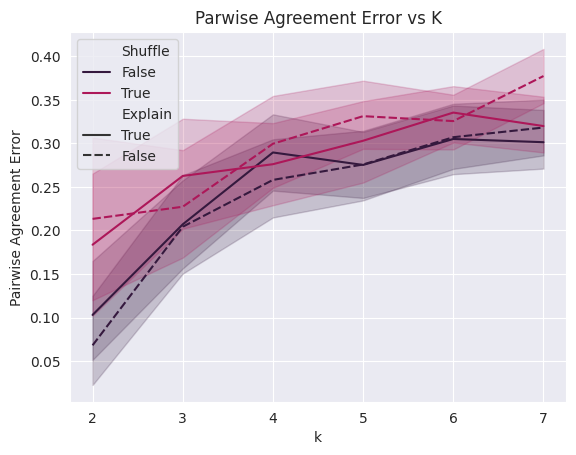

In [17]:
sns.set_style("darkgrid")
sns.lineplot(data, x='k', y='error', hue='Shuffle', style='Explain', palette=[sns.color_palette("rocket_r")[-1], sns.color_palette("rocket_r")[3]])
plt.ylabel("Pairwise Agreement Error")
plt.title("Parwise Agreement Error vs K")

In [18]:
exex = pd.read_json("../results/pairwise_explain_agreement_explain/rankings.jsonl", lines=True)
exexs = pd.read_json("../results/pairwise_explain_agreement_explain_shuffle/rankings.jsonl", lines=True)

exex['Pairwise Explain'] = ['True']*len(exex)
exex['Shuffle'] = ['False']*len(exex)

exexs['Pairwise Explain'] = ['True']*len(exexs)
exexs['Shuffle'] = ['True']*len(exexs)

ex['Pairwise Explain'] = ['False']*len(ex)
ex['Shuffle'] = ['False']*len(ex)

exs['Pairwise Explain'] = ['False']*len(exs)
exs['Shuffle'] = ['True']*len(exs)

data = pd.concat([exex, exexs, ex, exs])

In [19]:
data = data[data.pairwise.map(len) > 0]
data['zipped'] = list(zip(data['ranking_order'], data['pairwise']))
def error(input):
    num_wrong = 0
    k_wise, t_wise = input
    for i, c in enumerate(t_wise):
        num_wrong += k_wise[i] != c
    return num_wrong / len(t_wise)

data['error'] = data['zipped'].map(error)

Text(0.5, 1.0, 'Parwise Agreement Error vs K: K-wise Explains, Shuffling ')

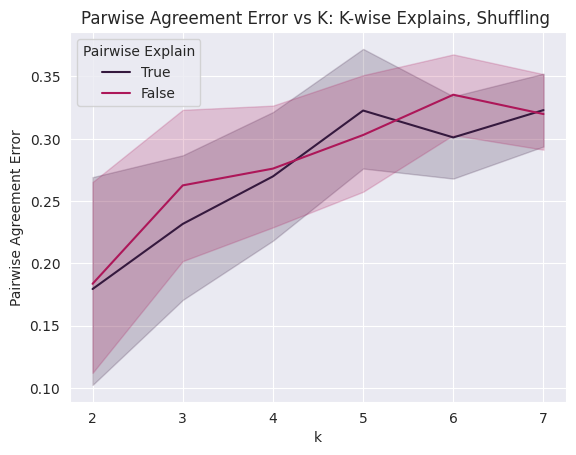

In [20]:
sns.set_style("darkgrid")
sns.lineplot(data[data['Shuffle'] == 'True'], x='k', y='error', hue='Pairwise Explain', palette=[sns.color_palette("rocket_r")[-1], sns.color_palette("rocket_r")[3]])
plt.ylabel("Pairwise Agreement Error")
plt.title("Parwise Agreement Error vs K: K-wise Explains, Shuffling ")

Text(0.5, 1.0, 'Parwise Agreement Error vs K:  K-wise Explains, No Shuffling')

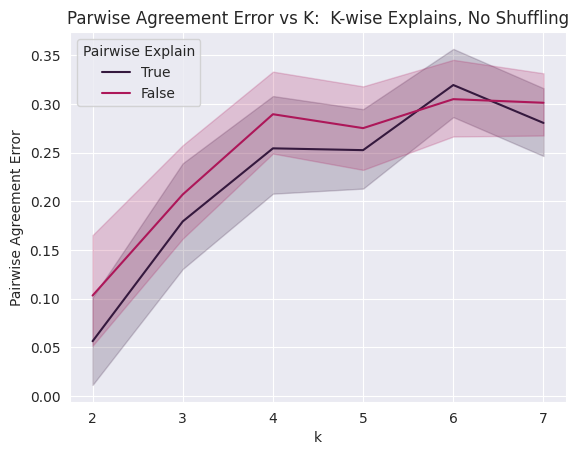

In [21]:
sns.set_style("darkgrid")
sns.lineplot(data[data['Shuffle'] == 'False'], x='k', y='error', hue='Pairwise Explain', palette=[sns.color_palette("rocket_r")[-1], sns.color_palette("rocket_r")[3]])
plt.ylabel("Pairwise Agreement Error")
plt.title("Parwise Agreement Error vs K:  K-wise Explains, No Shuffling")